# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the first agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent
import pandas as pd

agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=4)
checkpoint_name = 'checkpoint' # saved model name
window_size = 100              # Rolling windows size for score mean

The device is  cuda:0


C:\Users\ehsan\anaconda3\envs\drlnd\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 1	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 2	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 3	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 4	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 5	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 6	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 7	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 8	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 9	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 10	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 11	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 12	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 13	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 14	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 15	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 16	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 17	Single

Episode 134	Single Agent Score: -0.0050	Average Score: -0.0035
Episode 135	Single Agent Score: -0.0050	Average Score: -0.0035
Episode 136	Single Agent Score: 0.0450	Average Score: -0.0030
Episode 137	Single Agent Score: -0.0050	Average Score: -0.0030
Episode 138	Single Agent Score: -0.0050	Average Score: -0.0030
Episode 139	Single Agent Score: 0.0450	Average Score: -0.0025
Episode 140	Single Agent Score: -0.0050	Average Score: -0.0025
Episode 141	Single Agent Score: -0.0050	Average Score: -0.0025
Episode 142	Single Agent Score: 0.0450	Average Score: -0.0020
Episode 143	Single Agent Score: -0.0050	Average Score: -0.0020
Episode 144	Single Agent Score: -0.0050	Average Score: -0.0020
Episode 145	Single Agent Score: 0.0450	Average Score: -0.0015
Episode 146	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 147	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 148	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 149	Single Agent Score: 0.0450	Average Score: -0.00

Episode 265	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 266	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 267	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 268	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 269	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 270	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 271	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 272	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 273	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 274	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 275	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 276	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 277	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 278	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 279	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 280	Single Agent Score: -0.0050	Average Score: 

Episode 397	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 398	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 399	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 400	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 401	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 402	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 403	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 404	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 405	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 406	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 407	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 408	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 409	Single Agent Score: 0.0450	Average Score: -0.0045
Episode 410	Single Agent Score: -0.0050	Average Score: -0.0045
Episode 411	Single Agent Score: -0.0050	Average Score: -0.0045
Episode 412	Single Agent Score: 0.0450	Average Score: -0

Episode 529	Single Agent Score: 0.0450	Average Score: 0.0100
Episode 530	Single Agent Score: -0.0050	Average Score: 0.0100
Episode 531	Single Agent Score: -0.0050	Average Score: 0.0100
Episode 532	Single Agent Score: -0.0050	Average Score: 0.0100
Episode 533	Single Agent Score: -0.0050	Average Score: 0.0100
Episode 534	Single Agent Score: -0.0050	Average Score: 0.0090
Episode 535	Single Agent Score: -0.0050	Average Score: 0.0090
Episode 536	Single Agent Score: 0.0450	Average Score: 0.0095
Episode 537	Single Agent Score: -0.0050	Average Score: 0.0095
Episode 538	Single Agent Score: -0.0050	Average Score: 0.0095
Episode 539	Single Agent Score: -0.0050	Average Score: 0.0095
Episode 540	Single Agent Score: -0.0050	Average Score: 0.0095
Episode 541	Single Agent Score: 0.0450	Average Score: 0.0100
Episode 542	Single Agent Score: -0.0050	Average Score: 0.0100
Episode 543	Single Agent Score: -0.0050	Average Score: 0.0090
Episode 544	Single Agent Score: -0.0050	Average Score: 0.0090
Episode 545

Episode 661	Single Agent Score: -0.0050	Average Score: -0.0010
Episode 662	Single Agent Score: 0.0450	Average Score: -0.0005
Episode 663	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 664	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 665	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 666	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 667	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 668	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 669	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 670	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 671	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 672	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 673	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 674	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 675	Single Agent Score: -0.0050	Average Score: -0.0005
Episode 676	Single Agent Score: -0.0050	Average Score: -

Episode 793	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 794	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 795	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 796	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 797	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 798	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 799	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 800	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 801	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 802	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 803	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 804	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 805	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 806	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 807	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 808	Single Agent Score: -0.0050	Average Score: 

Episode 925	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 926	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 927	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 928	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 929	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 930	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 931	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 932	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 933	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 934	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 935	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 936	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 937	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 938	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 939	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 940	Single Agent Score: -0.0050	Average Score: 

Episode 1055	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1056	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1057	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1058	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1059	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1060	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1061	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1062	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1063	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1064	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1065	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1066	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1067	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1068	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1069	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1070	Single Agent Score: -0.0050

Episode 1185	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1186	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1187	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1188	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1189	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1190	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1191	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1192	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1193	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1194	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1195	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1196	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1197	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1198	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1199	Single Agent Score: -0.0050	Average Score: -0.0050
Episode 1200	Single Agent Score: -0.0050

Episode 1314	Single Agent Score: 0.0450	Average Score: -0.0040
Episode 1315	Single Agent Score: 0.0450	Average Score: -0.0035
Episode 1316	Single Agent Score: -0.0050	Average Score: -0.0035
Episode 1317	Single Agent Score: -0.0050	Average Score: -0.0035
Episode 1318	Single Agent Score: 0.0450	Average Score: -0.0030
Episode 1319	Single Agent Score: -0.0050	Average Score: -0.0030
Episode 1320	Single Agent Score: -0.0050	Average Score: -0.0030
Episode 1321	Single Agent Score: -0.0050	Average Score: -0.0030
Episode 1322	Single Agent Score: 0.0450	Average Score: -0.0025
Episode 1323	Single Agent Score: 0.0450	Average Score: -0.0020
Episode 1324	Single Agent Score: 0.0450	Average Score: -0.0015
Episode 1325	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 1326	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 1327	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 1328	Single Agent Score: -0.0050	Average Score: -0.0015
Episode 1329	Single Agent Score: -0.0050	Avera

Episode 1445	Single Agent Score: 0.0450	Average Score: 0.0125
Episode 1446	Single Agent Score: 0.0950	Average Score: 0.0135
Episode 1447	Single Agent Score: -0.0050	Average Score: 0.0135
Episode 1448	Single Agent Score: 0.0450	Average Score: 0.0140
Episode 1449	Single Agent Score: 0.0450	Average Score: 0.0145
Episode 1450	Single Agent Score: -0.0050	Average Score: 0.0145
Episode 1451	Single Agent Score: -0.0050	Average Score: 0.0145
Episode 1452	Single Agent Score: 0.0950	Average Score: 0.0155
Episode 1453	Single Agent Score: -0.0050	Average Score: 0.0155
Episode 1454	Single Agent Score: -0.0050	Average Score: 0.0155
Episode 1455	Single Agent Score: 0.0450	Average Score: 0.0155
Episode 1456	Single Agent Score: -0.0050	Average Score: 0.0155
Episode 1457	Single Agent Score: 0.0450	Average Score: 0.0160
Episode 1458	Single Agent Score: -0.0050	Average Score: 0.0160
Episode 1459	Single Agent Score: 0.0450	Average Score: 0.0165
Episode 1460	Single Agent Score: 0.1450	Average Score: 0.0180
E

Episode 1576	Single Agent Score: -0.0050	Average Score: 0.0349
Episode 1577	Single Agent Score: -0.0050	Average Score: 0.0349
Episode 1578	Single Agent Score: 0.0400	Average Score: 0.0353
Episode 1579	Single Agent Score: -0.0050	Average Score: 0.0348
Episode 1580	Single Agent Score: -0.0050	Average Score: 0.0343
Episode 1581	Single Agent Score: -0.0050	Average Score: 0.0343
Episode 1582	Single Agent Score: 0.1450	Average Score: 0.0358
Episode 1583	Single Agent Score: -0.0050	Average Score: 0.0358
Episode 1584	Single Agent Score: 0.0450	Average Score: 0.0363
Episode 1585	Single Agent Score: -0.0050	Average Score: 0.0359
Episode 1586	Single Agent Score: -0.0050	Average Score: 0.0359
Episode 1587	Single Agent Score: 0.1450	Average Score: 0.0369
Episode 1588	Single Agent Score: -0.0050	Average Score: 0.0364
Episode 1589	Single Agent Score: -0.0050	Average Score: 0.0354
Episode 1590	Single Agent Score: 0.0450	Average Score: 0.0354
Episode 1591	Single Agent Score: -0.0050	Average Score: 0.03

Episode 1709	Single Agent Score: -0.0050	Average Score: 0.0500
Episode 1710	Single Agent Score: 0.0450	Average Score: 0.0505
Episode 1711	Single Agent Score: 0.0450	Average Score: 0.0510
Episode 1712	Single Agent Score: -0.0050	Average Score: 0.0505
Episode 1713	Single Agent Score: -0.0050	Average Score: 0.0505
Episode 1714	Single Agent Score: -0.0050	Average Score: 0.0505
Episode 1715	Single Agent Score: -0.0050	Average Score: 0.0505
Episode 1716	Single Agent Score: -0.0050	Average Score: 0.0495
Episode 1717	Single Agent Score: -0.0050	Average Score: 0.0485
Episode 1718	Single Agent Score: 0.0950	Average Score: 0.0495
Episode 1719	Single Agent Score: -0.0050	Average Score: 0.0490
Episode 1720	Single Agent Score: -0.0050	Average Score: 0.0485
Episode 1721	Single Agent Score: -0.0050	Average Score: 0.0485
Episode 1722	Single Agent Score: 0.0950	Average Score: 0.0495
Episode 1723	Single Agent Score: 0.0450	Average Score: 0.0490
Episode 1724	Single Agent Score: -0.0050	Average Score: 0.04

Episode 1841	Single Agent Score: 0.0450	Average Score: 0.0504
Episode 1842	Single Agent Score: 0.0450	Average Score: 0.0509
Episode 1843	Single Agent Score: 0.0450	Average Score: 0.0509
Episode 1844	Single Agent Score: -0.0050	Average Score: 0.0504
Episode 1845	Single Agent Score: 0.0950	Average Score: 0.0514
Episode 1846	Single Agent Score: 0.0450	Average Score: 0.0519
Episode 1847	Single Agent Score: 0.0450	Average Score: 0.0519
Episode 1848	Single Agent Score: 0.2450	Average Score: 0.0544
Episode 1849	Single Agent Score: 0.0450	Average Score: 0.0544
Episode 1850	Single Agent Score: 0.0450	Average Score: 0.0544
Episode 1851	Single Agent Score: 0.1950	Average Score: 0.0539
Episode 1852	Single Agent Score: 0.0450	Average Score: 0.0539
Episode 1853	Single Agent Score: -0.0050	Average Score: 0.0539
Episode 1854	Single Agent Score: 0.0450	Average Score: 0.0539
Episode 1855	Single Agent Score: 0.0450	Average Score: 0.0539
Episode 1856	Single Agent Score: 0.0450	Average Score: 0.0534
Episod

Episode 1973	Single Agent Score: 0.0450	Average Score: 0.0549
Episode 1974	Single Agent Score: 0.0450	Average Score: 0.0554
Episode 1975	Single Agent Score: 0.0950	Average Score: 0.0564
Episode 1976	Single Agent Score: 0.0450	Average Score: 0.0569
Episode 1977	Single Agent Score: 0.1450	Average Score: 0.0584
Episode 1978	Single Agent Score: 0.0450	Average Score: 0.0584
Episode 1979	Single Agent Score: 0.2450	Average Score: 0.0609
Episode 1980	Single Agent Score: 0.1450	Average Score: 0.0624
Episode 1981	Single Agent Score: 0.1950	Average Score: 0.0639
Episode 1982	Single Agent Score: 0.0450	Average Score: 0.0614
Episode 1983	Single Agent Score: -0.0050	Average Score: 0.0609
Episode 1984	Single Agent Score: 0.0450	Average Score: 0.0614
Episode 1985	Single Agent Score: 0.1450	Average Score: 0.0624
Episode 1986	Single Agent Score: 0.0450	Average Score: 0.0624
Episode 1987	Single Agent Score: 0.0450	Average Score: 0.0629
Episode 1988	Single Agent Score: 0.3950	Average Score: 0.0664
Episode

Episode 2105	Single Agent Score: 0.1950	Average Score: 0.0770
Episode 2106	Single Agent Score: 0.0450	Average Score: 0.0775
Episode 2107	Single Agent Score: -0.0050	Average Score: 0.0765
Episode 2108	Single Agent Score: 0.1450	Average Score: 0.0775
Episode 2109	Single Agent Score: 0.0450	Average Score: 0.0775
Episode 2110	Single Agent Score: 0.0450	Average Score: 0.0775
Episode 2111	Single Agent Score: 0.0450	Average Score: 0.0780
Episode 2112	Single Agent Score: 0.1450	Average Score: 0.0790
Episode 2113	Single Agent Score: -0.0050	Average Score: 0.0790
Episode 2114	Single Agent Score: 0.0450	Average Score: 0.0790
Episode 2115	Single Agent Score: 0.0950	Average Score: 0.0795
Episode 2116	Single Agent Score: 0.0450	Average Score: 0.0795
Episode 2117	Single Agent Score: 0.0450	Average Score: 0.0795
Episode 2118	Single Agent Score: 0.1450	Average Score: 0.0795
Episode 2119	Single Agent Score: -0.0050	Average Score: 0.0795
Episode 2120	Single Agent Score: 0.0450	Average Score: 0.0775
Episo

Episode 2237	Single Agent Score: -0.0050	Average Score: 0.0065
Episode 2238	Single Agent Score: -0.0050	Average Score: 0.0065
Episode 2239	Single Agent Score: 0.1450	Average Score: 0.0080
Episode 2240	Single Agent Score: 0.0950	Average Score: 0.0090
Episode 2241	Single Agent Score: 0.1450	Average Score: 0.0105
Episode 2242	Single Agent Score: 0.1450	Average Score: 0.0120
Episode 2243	Single Agent Score: 0.0950	Average Score: 0.0130
Episode 2244	Single Agent Score: 0.1450	Average Score: 0.0145
Episode 2245	Single Agent Score: 0.0450	Average Score: 0.0150
Episode 2246	Single Agent Score: 0.2950	Average Score: 0.0180
Episode 2247	Single Agent Score: 0.0450	Average Score: 0.0185
Episode 2248	Single Agent Score: -0.0050	Average Score: 0.0185
Episode 2249	Single Agent Score: 0.0450	Average Score: 0.0190
Episode 2250	Single Agent Score: 0.0950	Average Score: 0.0200
Episode 2251	Single Agent Score: 0.0950	Average Score: 0.0210
Episode 2252	Single Agent Score: 0.0450	Average Score: 0.0215
Episo

Episode 2369	Single Agent Score: 0.1450	Average Score: 0.0825
Episode 2370	Single Agent Score: -0.0050	Average Score: 0.0825
Episode 2371	Single Agent Score: 0.0450	Average Score: 0.0825
Episode 2372	Single Agent Score: -0.0050	Average Score: 0.0815
Episode 2373	Single Agent Score: -0.0050	Average Score: 0.0805
Episode 2374	Single Agent Score: 0.3450	Average Score: 0.0815
Episode 2375	Single Agent Score: 0.0450	Average Score: 0.0795
Episode 2376	Single Agent Score: 0.0450	Average Score: 0.0795
Episode 2377	Single Agent Score: 0.0950	Average Score: 0.0765
Episode 2378	Single Agent Score: -0.0050	Average Score: 0.0760
Episode 2379	Single Agent Score: 0.0450	Average Score: 0.0765
Episode 2380	Single Agent Score: -0.0050	Average Score: 0.0755
Episode 2381	Single Agent Score: 0.1450	Average Score: 0.0755
Episode 2382	Single Agent Score: -0.0050	Average Score: 0.0750
Episode 2383	Single Agent Score: -0.0050	Average Score: 0.0745
Episode 2384	Single Agent Score: 0.0450	Average Score: 0.0735
E

Episode 2502	Single Agent Score: 0.2450	Average Score: 0.1555
Episode 2503	Single Agent Score: 0.0450	Average Score: 0.1560
Episode 2504	Single Agent Score: 0.3950	Average Score: 0.1595
Episode 2505	Single Agent Score: 0.0950	Average Score: 0.1595
Episode 2506	Single Agent Score: 0.0450	Average Score: 0.1575
Episode 2507	Single Agent Score: 0.0950	Average Score: 0.1560
Episode 2508	Single Agent Score: 0.3450	Average Score: 0.1585
Episode 2509	Single Agent Score: 0.1950	Average Score: 0.1595
Episode 2510	Single Agent Score: 0.1950	Average Score: 0.1605
Episode 2511	Single Agent Score: 0.0950	Average Score: 0.1570
Episode 2512	Single Agent Score: 0.3450	Average Score: 0.1600
Episode 2513	Single Agent Score: 0.4450	Average Score: 0.1640
Episode 2514	Single Agent Score: 0.1450	Average Score: 0.1640
Episode 2515	Single Agent Score: 0.1450	Average Score: 0.1645
Episode 2516	Single Agent Score: 0.0950	Average Score: 0.1645
Episode 2517	Single Agent Score: -0.0050	Average Score: 0.1630
Episode

Episode 2634	Single Agent Score: 0.0950	Average Score: 0.2560
Episode 2635	Single Agent Score: 0.1950	Average Score: 0.2565
Episode 2636	Single Agent Score: 0.2450	Average Score: 0.2500
Episode 2637	Single Agent Score: 0.1950	Average Score: 0.2495
Episode 2638	Single Agent Score: 0.4450	Average Score: 0.2510
Episode 2639	Single Agent Score: -0.0050	Average Score: 0.2500
Episode 2640	Single Agent Score: 0.4450	Average Score: 0.2515
Episode 2641	Single Agent Score: 0.0450	Average Score: 0.2505
Episode 2642	Single Agent Score: 0.3950	Average Score: 0.2545
Episode 2643	Single Agent Score: 0.0950	Average Score: 0.2530
Episode 2644	Single Agent Score: 0.0950	Average Score: 0.2530
Episode 2645	Single Agent Score: 0.1950	Average Score: 0.2535
Episode 2646	Single Agent Score: 0.2450	Average Score: 0.2550
Episode 2647	Single Agent Score: 0.1450	Average Score: 0.2560
Episode 2648	Single Agent Score: 0.0950	Average Score: 0.2570
Episode 2649	Single Agent Score: 0.0950	Average Score: 0.2570
Episode

Episode 2766	Single Agent Score: 0.0450	Average Score: 0.3400
Episode 2767	Single Agent Score: 0.0950	Average Score: 0.3385
Episode 2768	Single Agent Score: 0.5950	Average Score: 0.3445
Episode 2769	Single Agent Score: 0.8450	Average Score: 0.3480
Episode 2770	Single Agent Score: 0.2450	Average Score: 0.3505
Episode 2771	Single Agent Score: 0.0950	Average Score: 0.3485
Episode 2772	Single Agent Score: 1.1450	Average Score: 0.3550
Episode 2773	Single Agent Score: 0.2950	Average Score: 0.3550
Episode 2774	Single Agent Score: 1.1950	Average Score: 0.3645
Episode 2775	Single Agent Score: 0.7450	Average Score: 0.3685
Episode 2776	Single Agent Score: 0.8950	Average Score: 0.3775
Episode 2777	Single Agent Score: 0.2950	Average Score: 0.3765
Episode 2778	Single Agent Score: 0.4450	Average Score: 0.3775
Episode 2779	Single Agent Score: 0.5450	Average Score: 0.3825
Episode 2780	Single Agent Score: 0.2950	Average Score: 0.3845
Episode 2781	Single Agent Score: 0.2950	Average Score: 0.3855
Episode 

Episode 2898	Single Agent Score: 0.1950	Average Score: 0.3086
Episode 2899	Single Agent Score: 0.0450	Average Score: 0.3081
Episode 2900	Single Agent Score: 0.2450	Average Score: 0.3086
Episode 2901	Single Agent Score: 0.2950	Average Score: 0.3116
Episode 2902	Single Agent Score: 0.2450	Average Score: 0.3051
Episode 2903	Single Agent Score: 0.4950	Average Score: 0.3081
Episode 2904	Single Agent Score: 0.2450	Average Score: 0.3081
Episode 2905	Single Agent Score: 0.0950	Average Score: 0.3061
Episode 2906	Single Agent Score: 0.2450	Average Score: 0.3016
Episode 2907	Single Agent Score: 0.3450	Average Score: 0.3051
Episode 2908	Single Agent Score: 0.1450	Average Score: 0.3061
Episode 2909	Single Agent Score: 0.4450	Average Score: 0.3091
Episode 2910	Single Agent Score: -0.0050	Average Score: 0.3091
Episode 2911	Single Agent Score: 0.3950	Average Score: 0.3086
Episode 2912	Single Agent Score: 0.1950	Average Score: 0.3091
Episode 2913	Single Agent Score: 0.8450	Average Score: 0.3166
Episode

Episode 3030	Single Agent Score: 0.1450	Average Score: 0.3465
Episode 3031	Single Agent Score: 1.1450	Average Score: 0.3540
Episode 3032	Single Agent Score: -0.0050	Average Score: 0.3540
Episode 3033	Single Agent Score: 0.5950	Average Score: 0.3575
Episode 3034	Single Agent Score: 0.3950	Average Score: 0.3545
Episode 3035	Single Agent Score: 0.6950	Average Score: 0.3585
Episode 3036	Single Agent Score: 0.9950	Average Score: 0.3650
Episode 3037	Single Agent Score: 0.1450	Average Score: 0.3545
Episode 3038	Single Agent Score: 2.0450	Average Score: 0.3725
Episode 3039	Single Agent Score: 0.0450	Average Score: 0.3730
Episode 3040	Single Agent Score: 0.5950	Average Score: 0.3780
Episode 3041	Single Agent Score: 0.4950	Average Score: 0.3785
Episode 3042	Single Agent Score: 0.4950	Average Score: 0.3805
Episode 3043	Single Agent Score: 0.0450	Average Score: 0.3780
Episode 3044	Single Agent Score: 1.1950	Average Score: 0.3870
Episode 3045	Single Agent Score: 0.2450	Average Score: 0.3775
Episode

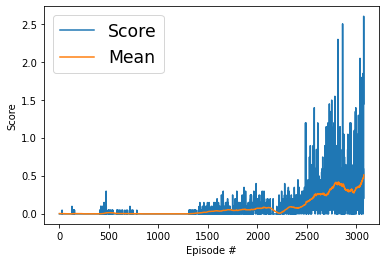

In [8]:
def ddpg(n_episodes=4000):
    scores_deque = deque(maxlen=window_size)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations  
        agent.reset()
        score = np.zeros(num_agents)
        while True:
            actions = agent.act(states)                               # find the best actions for all agent
            env_info = env.step(actions)[brain_name]                  # perform these action in the env
            next_states = env_info.vector_observations                # get the next states for all agents
            rewards = env_info.rewards                                # get all rewards for all agents
            dones = env_info.local_done                               # get the status of agent if they are finished
            agent.step(states, actions, rewards, next_states, dones)  # update the model
            states = next_states
            score += rewards                                          # accumulate the rewards in the current episode
            if any(dones):
                break 
                
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        
        print('\rEpisode {}\tSingle Agent Score: {:.4f}\tAverage Score: {:.4f}'.format(i_episode,np.mean(score), np.mean(scores_deque)))
        if i_episode % window_size == 0:
            torch.save(agent.actor_local.state_dict(), checkpoint_name + '_actor.pth')
            torch.save(agent.critic_local.state_dict(), checkpoint_name + '_critic.pth')
        if np.mean(scores_deque) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tSingle Agent Score: {:.4f}\tAverage Score: {:.4f}'.format(i_episode,np.mean(score), np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), checkpoint_name + '_actor.pth')
            torch.save(agent.critic_local.state_dict(), checkpoint_name + '_critic.pth')
            break
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.convolve(np.pad(scores, (window_size-1, 0), 'constant'), np.ones(window_size)/window_size, mode='valid'))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(('Score','Mean'), fontsize='xx-large')
plt.show()

In [8]:
if torch.cuda.is_available():
    map_location=lambda storage, loc: storage.cuda()
else:
    map_location='cpu'

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location=map_location))
agent.actor_target.load_state_dict(torch.load('checkpoint_actor.pth', map_location=map_location))

agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth', map_location=map_location))
agent.critic_target.load_state_dict(torch.load('checkpoint_critic.pth', map_location=map_location))

for i in range(1, 5):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)                        # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.5000000074505806
Score (max over agents) from episode 2: 0.7000000104308128
Score (max over agents) from episode 3: 0.30000000447034836
Score (max over agents) from episode 4: 1.3000000193715096


In [9]:
env.close()